# MA2501 - Assignment 2
----
By Markus Valås Hagen, 
Andreas Palm Sivertsen & 
Thomas Wilskow Thorbjørnsen

## Information regarding this project
----
This project wasn't originally written in jupyter but it is ported into this notebook. Please keep this in mind when reading the notebook

### Imports
-------

In [111]:
import matplotlib.pyplot as plt
import autograd.numpy as np
import functools as func
import time

from autograd.builtins import list, dict, tuple
from autograd import jacobian, grad
from operator import mul
from functools import reduce
from math import factorial, floor

# Preliminary Code
----

## Binary Search
----

In [112]:
def binarySearch(array, searchFor):
    """
    A binary search algorithm
    Parameters
    ----------
    array :: [Double]
        Binary tree structured list
    searchFor :: Double
        The element to find
    Returns
    ----------
    Returns the index where the element (rounded down) can be found
    """
    minIndex = 0
    m = len(array) - 1
    maxIndex = m
    midIndex = floor((minIndex + maxIndex)/2)

    while maxIndex >= minIndex:
        midIndex = floor((minIndex + maxIndex)/2)
        
        v = array[midIndex]

        if searchFor < v:
            maxIndex = midIndex - 1

        elif searchFor > v:
            minIndex = midIndex + 1

        elif searchFor == v:
            return midIndex

    if v <= searchFor:
        return midIndex
    else:
        return midIndex-1

## Gradients and gradient Descent
----

In [158]:
def gradientDescent(F, x0, γ = 10, ρ = 0.8, σ = 1.7, TOL = 1e-7, maxIter = 100):
    """
    The gradient descent algortihm
    Parameters
    ----------
    F :: Function
        Function to minimize
    x0 :: numpy array
        initial guess
    γ :: Double
        The step-size parameter
    ρ, σ :: Double
        Hyperparameters controlling step-size
    TOL :: Double
        Tolerance for breaking the loop
    maxIter :: Int
        number of iterations to do
    Returns
    ----------
    Returns the best fitting input for F such that F is minimized
    """
    gradF = F.gradient
    x1 = x0
    φ = F(x1)
    F.history.append(φ)
    for m in range(maxIter):
        # χ = x0
        g = gradF(x1)
        for n in range(200):
            x1 = x0 - 1/γ*g
            ψ = F(x1)
            if ψ <= φ + np.dot(g,x1-x0)+γ/2*np.linalg.norm(x1-x0)**2:
                x0, φ, γ = x1, ψ, ρ*γ
                break
            else:
                γ *= σ
        F.history.append(φ)
        if np.linalg.norm(g) <= TOL: # or np.linalg.norm(g) <= TOL:
            break
    return x1

## Function storing, easy plotting and more!
----

In [114]:
class Plottable():
    'A class for storing functions, with easy plotting and derivatives'
    __slots__ = ["function", "start", "end", "history", "gradient"]

    def __init__(self, function=lambda x: 0, mi=0, ma=1, gradient = None):
        """
        A Constructor
        Parameters
        ----------
        function :: Function
            function to store
        mi, ma :: Double
            minimum and maximum of plotting range, respectively
        gradient :: Function
            overloading of derivative
        """
        self.function, self.start, self.end, self.history = function, mi, ma, []
        if gradient == None:
            self.gradient = self.diff()
        else:
            self.gradient = gradient

    def plot(self, *args, start=None, end=None, step=500, **kwargs):
        'Function which allows for easy plotting'
        if start == None or end == None:
            xs = np.linspace(self.end, self.start, step)
            ys = list(map(self.function, xs))
        else:
            xs = np.linspace(start, end, step)
            ys = list(map(self.function, xs))
        plt.plot(xs, ys, *args, **kwargs)

    def __repr__(self):  # Class representation
        plt.figure()
        self.plot()
        plt.show()
        return "printed!"

    def __call__(self, *args):  # Function calling overloading
        return self.function(*args)

    def diff(self):
        'A fallback derivative'
        return grad(self.function)

## Nodespreads
----
Every function here takes in: a - start value, b - end value and N/steps - amount of nodes. The node versions also allows to apply a function to each spread.

In [115]:
def equiX(a,b,N):
    return np.linspace(a,b,N)

def equiNode(start, end, step, f = lambda x: 0):
    xs = np.linspace(start, end, step)
    ys = map(f, xs)
    return [a for a in zip(xs, ys)]

def chebyX(a,b,N):
    return [(b-a)/2*(np.cos(np.pi*(2*x+1)/(2*N))) + (b+a)/2 for x in range(N)]

def chebyNode(start, end, steps, f = lambda x: 0):
    xs = [(end - start) / 2 * (np.cos(np.pi * (2 * x + 1) / (2 * steps))) + (end + start) / 2 for x in range(steps)]
    ys = map(f, xs)
    return [(x, y) for (x, y) in zip(xs, ys)]

## Test functions
----
The functions we are using for testing throughout the project.

In [116]:
# This is supposed to be defined on [0,1]
def a(x):
    return np.cos(2 * np.pi * x)

# This is supposed to be defined on [0,π/4]
def b(x):
    return np.exp(3 * x) * np.sin(2 * x)

def runge(x):
    """
    The runge function
    Parameters
    ----------
    x :: Double
        The value to evaluate in
    Returns
    ----------
    Returns the evaluation at x
    """
    return 1 / (x ** 2 + 1)

def exfunc(x):
    return (3/4)*(np.exp((-1/4)*(9*x - 2)**2) + np.exp((-1/49)*(9*x + 1)**2)) + (1/2)*np.exp((-1/4)*(9*x - 7)**2) - (1/10)*np.exp(-(9*x - 4)**2)

# Lagrange Interpolation
----

## Lagrange Interpolation
----


In [ ]:
def lagrangify(ps):
    """
    Creates a lagrange polynomial as a function
    Parameters
    ----------
    ps :: [(x,y)]
        A list of nodes as inputs
    Returns
    ----------
    Returns a function which is evaluation of this polynomial in x
    """
    if len(ps) == 1:
        return lambda x : ps[0][1]
    else:
        λj = lambda j, ls, x: ps[j][1] * func.reduce(mul, [1] + [(x - arg) / (ls[j] - arg) for arg in ls if ls[j] != arg])
        return lambda x : sum([λj(i, [χ for χ,_ in ps], x) for i in range(len(ps))])

class LagrangePol(Plottable):
    'A class for easy creation and plotting of lagrange polynomials'

    def __init__(self, ps):
        """
        A constructor
        Parameters
        ----------
        ps :: [(x,y)]
            A list of nodes
        """
        xs = [x for x,_ in ps]
        start, end = min(xs), max(xs)
        function = lagrangify(ps)
        super().__init__(function, start, end, gradient = None)

## Spline Interpolation
----

In [118]:
def splinify(ips):
    """
    Creates a spline interpolation of a function
    Parameters 
    ----------
    ips :: [[(x,y)]]
        A list of lists of nodes. Each sublist represent a sub-interpol
    Returns
    ----------
    Returns a function which is the spline interpolation evaluated at x
    """
    intervals = [x for x,_ in [min(ps) for ps in ips]]
    functions = [lagrangify(ps) for ps in ips]

    def pwf(x):
        i = binarySearch(intervals, x)
        return functions[i](x)
        
    return pwf

class SplinePol(Plottable):
    'A class for easy creation and plotting of spline interpolations'

    def __init__(self, ips):
        """
        A constructor
        Parameters
        ----------
        ips :: [[(x,y)]]
            A list of lists of nodes. Each sublist represent a sub-interpol
        """
        function = splinify(ips)
        minxs, maxxs = [x for x,_ in ips[0]], [x for x,_ in ips[-1]]
        start, end = min(minxs), max(maxxs)
        super().__init__(function, start, end, gradient = None)

## Optimization of Lagrange Interpolation
----

In [119]:
def optLagrangify(psKnown, xs):
    """
    Creates a lagrange polynomial with the error minimized
    Parameters
    ----------
    psKnown :: [(x,y)]
        List of every point where we know the value of the function
    xs :: numpy array
        Initial guess of the best x-values
    Returns
    ----------
    A lagrange polynomial with minimized error
    """

    ls = [x for x,_ in psKnown]
    a, b, N = min(ls), max(ls), len(ls)

    def lap(psKnown = psKnown):
        xsKnown, ysKnown = [], []
        for x,y in psKnown:
            xsKnown.append(x)
            ysKnown.append(y)
        def funkyfy(x):
            i = binarySearch(ls, x)
            if i >= N-1:
                i = N-2
            a = (ysKnown[i+1]-ysKnown[i])/(xsKnown[i+1]-xsKnown[i])
            return a*x+ysKnown[i]-a*xsKnown[i]
        return lambda x: funkyfy(x)

    f = lap()

    def cost(ks):
        ps = [(x,f(x)) for x in ks]
        k = (b-a)/N
        s = 0
        p = lagrangify(ps)
        for x,y in psKnown:
            s = s + (y-p(x))**2
        return k*s

    def lagGrad(i, ks, x):
        partOne = grad(f)(ks[i])*func.reduce(mul, [1] + [(x - ks[k])/(ks[i]-ks[k]) for k in range(len(ks)) if i != k])
        partTwo = f(ks[i])*sum([(ks[k]-x)/((ks[i]-ks[k])**2)*func.reduce(mul, [1] + [(x-ks[j])/(ks[i]-ks[j]) for j in range(len(ks)) if j != i and j != k]) for k in range(len(ks)) if k != i])
        partThree = sum([f(ks[k])*(x-ks[k])/((ks[k]-ks[i])**2)*func.reduce(mul, [1] + [(x-ks[j])/(ks[k]-ks[j]) for j in range(len(ks)) if k != j and j != i]) for k in range(len(ks)) if k != i])
        return partOne + partTwo + partThree

    def gradient(ks):
        ps = [(x,f(x)) for x in ks]
        k = 2*(a-b)/N
        s = np.full(ks.shape, 0)
        p = lagrangify(ps)
        dp = lambda x: np.array([lagGrad(i, ks, x) for i in range(len(ks))])
        for x,y in psKnown:
            dps = dp(x)
            c = y-p(x)
            s = s + c*dps
        return k*s

    cp = Plottable(cost, None, None, gradient)
    bNodes = gradientDescent(cp, np.array(xs))
    pbNodes = [(x,f(x)) for x in bNodes]

    return lagrangify(pbNodes), cp.history


class OptLagrangePol(Plottable):
    'A class for easy creation and plotting of optimal lagrange polynomials'
    
    def __init__(self, psKnown, xStart):
        """
        A constructor
        Parameters
        ----------
        psKnown :: [(x,y)]
            Known points of the function
        xStart :: numpy list
            Initial guess for lagrange polynomial
        """
        ls = [x for x,_ in psKnown]
        start, end = min(ls), max(ls)
        function, hs = optLagrangify(psKnown, xStart)
        super().__init__(function, start, end, None)
        self.history = hs

#### Optimization of Lagrange interpolation with known function
----

In [120]:
def optLagrangifyLeg(f, psKnown, xs):
    """
    creates an optimized lagrange polynomial where the function we want to interpolate is known
    Parameters
    ----------
    f :: Function
        function to interpolate
    psKnown :: [(x,y)]
        points to estimate cost of interpolation
    xs :: numpy array
        An array of initial guess for the interpolation
    Returns
    ----------
    Returns an optimized lagrange polynomial
    """

    ls = [x for x,_ in psKnown]
    a, b, N = min(ls), max(ls), len(ls)

    def cost(ks):
        ps = [(x,f(x)) for x in ks]
        k = (b-a)/N
        s = 0
        p = lagrangify(ps)
        for x,y in psKnown:
            s = s + (y-p(x))**2
        return k*s

    def lagGrad(i, ks, x):
        partOne = grad(f)(ks[i])*func.reduce(mul, [1] + [(x - ks[k])/(ks[i]-ks[k]) for k in range(len(ks)) if i != k])
        partTwo = f(ks[i])*sum([(ks[k]-x)/((ks[i]-ks[k])**2)*func.reduce(mul, [1] + [(x-ks[j])/(ks[i]-ks[j]) for j in range(len(ks)) if j != i and j != k]) for k in range(len(ks)) if k != i])
        partThree = sum([f(ks[k])*(x-ks[k])/((ks[k]-ks[i])**2)*func.reduce(mul, [1] + [(x-ks[j])/(ks[k]-ks[j]) for j in range(len(ks)) if k != j and j != i]) for k in range(len(ks)) if k != i])
        return partOne + partTwo + partThree

    def gradient(ks):
        ps = [(x,f(x)) for x in ks]
        k = 2*(a-b)/N
        s = np.full(ks.shape, 0)
        p = lagrangify(ps)
        dp = lambda x: np.array([lagGrad(i, ks, x) for i in range(len(ks))])
        for x,y in psKnown:
            dps = dp(x)
            c = y-p(x)
            s = s + c*dps
        return k*s

    cp = Plottable(cost, None, None, gradient)
    bNodes = gradientDescent(cp, np.array(xs))
    pbNodes = [(x,f(x)) for x in bNodes]

    return lagrangify(pbNodes), cp.history


class OptLagrangePolLeg(Plottable):
    'A class for easy creation and plotting of optimized lagrange polynomial'
        
    def __init__(self, f, psKnown, xStart):
        """
        A constructor
        Parameters
        ----------
        f :: Function
            function to interpolate
        psKnown :: [(x,y)]
            points to calculate cost with
        xStart :: numpy array
            Initial guess for the interpolation
        """
        ls = [x for x,_ in psKnown]
        start, end = min(ls), max(ls)
        function, hs = optLagrangifyLeg(f, psKnown, xStart)
        super().__init__(function, start, end, None)
        self.history = hs

# Radial Basis Function Interpolation
----

In [121]:
def coq(f, N, a, b):
    """
    Global variable declaration
    Parameters
    ----------
    f :: Function 
        The function to interpolate (used in the cost function and get_W)
    N :: Int
        Number of steps in the cost function
    a :: Int
        Start of nodes
    b :: Int
        End of nodes
    """
    coq.f, coq.N, coq.a, coq.b = f, N, a, b

def phi(r,e=3):
    """
    Phi function used in RBF interpolation
    Parameters
    ----------
    r :: Float
        phi(abs(x-x)), r=abs(x-xi)
    e :: Float
        Shape parameter
    Returns
    ----------
    Returns the calculated double
    """
    return np.exp(-(e * r) ** 2)
    

def Get_w(x, e=3):
    """
    Computes the vector w used in the interpolation
    Parameters
    ----------
    x :: np.array(Double)
        Nodes to interpolate, with the shape parameter as the last entry
    e :: float
        Shape parameter, often just x[-1]
    Returns
    ----------
    Returns a NumPy array of doubles of the weights to apply in interpolation
    """
    M = np.array([[phi(abs(x[i]-x[j]),e) for j in range(len(x)-1)] for i in range(len(x)-1)], dtype = float)
    f_vec = np.array([coq.f(x[i]) for i in range(len(x)-1)])
    ws = np.linalg.solve(M, f_vec)
    return ws

def interpolation(xs):
    """
    This is the interpolated function
    Paramters
    ----------
    xs :: np.array(Double)
        array of points to interpolate over with the shape parameter as the last entry
    Returns
    ----------
    Returns a function of the interpolation
    """
    ws = Get_w(xs,xs[-1])
    return lambda x: sum([ws[i]*phi(abs(x-xs[i]),xs[-1]) for i in range(len(xs)-1)])


def cost_int(xs):
    """
    Return the cost of the function
    Parameters
    ----------
    xs :: np.array(Double)
        nodes to interpolate, withe the shape parameter as the last entry
    Returns
    ----------
    Returns a double of the cost of the interpolation 
    """
    
    xis = np.array(equiX(coq.a, coq.b, coq.N))
    g = interpolation(xs)
    s = 0
    for i in range(coq.N):
        s = s + (coq.f(xis[i])-g(xis[i]))**2
    return ((coq.b-coq.a)/coq.N)*s

# Error Calculations
----

## Virtual Error Calculation class
----

In [122]:
class ErrorCompare(Plottable):
    'A virtual class for calculating the error of a function and some generator'
    
    __slots__ = ["sqErr", "supErr", "N"]

    def __init__(self, function, mi, ma, n=10):
        """
        A virtual constructor
        Parameters
        ----------
        function :: Function
            function to find error on
        mi, ma :: Double
            start and end of domain, respectively
        n :: Int
            some max bound for the generator
        """
        super().__init__(function, mi, ma)

    @func.lru_cache(256)
    def genny(self, steps=None):
        'A virtual generator function'
        return None

    def err2(self, n, k):
        """
        General method for finding 2-norm error
        Parameters
        ----------
        n :: Int
            Fineness of error
        k :: Int
            generator input
        Returns
        ----------
        Returns 2-norm error
        """
        p, f = [P[1] for P in equiNode(self.start, self.end, 100 * n, self.genny(steps=k).function)], [P[1] for P in equiNode(self.start, self.end, 100 * n, self.function)]
        return np.sqrt((self.end - self.start) / (100 * n) * sum([(y - x) ** 2 for (x, y) in zip(p, f)]))

    def errSup(self, n, k):
        """
        General method for finding sup-norm erro
        Parameters
        ----------
        n :: Int
            Fineness of error
        k :: Int
            generator input
        Returns
        ----------
        Returns sup-norm error
        """
        p, f = [P[1] for P in equiNode(self.start, self.end, 100 * n, self.genny(steps=k).function)], [P[1] for P in equiNode(self.start, self.end, 100 * n, self.function)]
        return max([abs(y - x) for (x, y) in zip(p, f)])

    def plot(self, *args, **kwargs):
        '''Ploting the 2-norm and sup-norm as a function of the number of interpolations points used.'''
        plt.semilogy(range(1, self.N + 1), self.sqErr, *args, label="Square Error", *kwargs)
        plt.semilogy(range(1, self.N + 1), self.supErr, *args, label="Sup Error", *kwargs)
        plt.legend()

    def plot2(self, *args, **kwargs):
        'Plotting only the sup norm error'
        plt.semilogy(range(1, self.N+1), self.sqErr, *args, label=f"Square Error with {self.nodes}nodes", *kwargs)
        plt.legend()

## Error of Lagrange Interpolation
----

In [162]:
class ErrorLagrange(ErrorCompare):
    'A subclass for calculating error of lagrange interpolations'
    __slots__ = ["nodes"]

    def __init__(self, function, mi, ma, n=20, nodes = "Equi"):
        """
        A constructor
        Parameters
        ----------
        function :: Function
            The function to interpolate
        mi, ma :: Double
            start and end of domain, respectively
        n :: Int 
            maximum of nodes to test for
        nodes :: String
            the type of nodes to interpolate over"""
        super().__init__(function, mi, ma, n)
        self.nodes = nodes
        self.N = n
        self.sqErr, self.supErr = [self.err2(n, m) for m in range(1, n+1)], [self.errSup(n, m) for m in range(1, n+1)]

    @func.lru_cache(256)
    def genny(self, steps=None):
        'A function to generate lagrange polynomials'
        if steps == None:
            steps = self.N
        if self.nodes == "Equi":
            return LagrangePol(equiNode(self.start, self.end, steps, self.function))
        if self.nodes == "Cheby":
            return LagrangePol(chebyNode(self.start, self.end, steps, self.function))
        raise TypeError("Not a valid nodespread")

## Error of Spline Interpolation
----

In [124]:
class ErrorSpline(ErrorCompare):
    'A subclass to claculate the error of spline interpolation'
    
    __slots__ = ["K", "extras"]

    def __init__(self, function, mi, ma, n=10, k=10, extra = False):
        """
        A constructor
        Parameters
        ----------
        function :: Function
            the function to interpolate
        mi, ma :: Double
            start and end of domain, respectively
        n :: Int
            the amount of nodes in each subinterval
        k :: Int
            the maximum amount of subintervals to use
        extra :: Bool
            to calculate something needed for problem c or not
        """
        super().__init__(function, mi, ma)
        self.N, self.K = n, k
        if extra:
            self.extras = [[self.errSup(self.N, (k+2, np)) for k in range(self.K)] for np in range(1,11)]
        self.supErr = [self.errSup(self.N, (k+2, self.N)) for k in range(self.K)]  # Fiks dette Thomas!

    @func.lru_cache(256)
    def genny(self, steps=None):
        'Generator function for spline interpolations'
        intervals = np.linspace(self.start, self.end, steps[0])
        intervals = [(intervals[i], intervals[i + 1]) for i in range(len(intervals) - 1)]
        pintervals = [equiNode(mi, ma, steps[1], self.function) for (mi, ma) in intervals]
        return SplinePol(pintervals)

    def extraplot(self, *args, **kwargs):
        'Plot needed for problem c'
        for i in range(len(self.extras)):
            plt.semilogy([k for k in range(1, self.K+1)], self.extras[i], *args, label = f"Sup Error with n ={i+1}", **kwargs)
        plt.legend()

    def plot(self, *args, **kwargs):
        '''This is overloaded as we're plotting with another variable than the number of interpolation points'''
        # plt.semilogy(range(2, self.K+2), self.sqErr, label = "Square Error")
        plt.semilogy([self.N * i for i in range(1, self.K + 1)], self.supErr, *args, label=f"Sup Error with n={self.N}", **kwargs)
        plt.legend()

## Error of Optimized Lagrange
----

In [145]:
class ErrorOpt(ErrorCompare):
    'A subclass to calculate the error of optimized lagrange interpolation'
    
    __slots__ = ["v", "knownEqui"]

    def __init__(self, f, mi, ma, N = 1000, v = "Equi"):
        """
        A constructor
        Parameters
        ----------
        f :: Function
            the function to interpolate
        mi, ma :: Double
            start and end of domain, respectively
        N :: Int
            the amount of known points
        v :: String
            the type of nodespreads to use; Warning: Not yet fully implemented, dont use!
        """
        self.function, self.start, self.end, self.N = f, mi, ma, N
        self.knownEqui = equiNode(mi, ma, N, f)
        self.v = "Equi"
        self.sqErr = [self.err2(self.N, k) for k in range(1, 21)]


    def genny(self, steps = 1):
        'Generator for optimizing lagrange polynomials'
        xs = equiX(self.start, self.end, steps)
        if self.v == "Equi":
            return OptLagrangePol(self.knownEqui, xs)
        # elif self.v == "Cheby":
        #     return OptLangrangePol(self.knownCheby, steps)
        return None

    def plot(self, *args, **kwargs):
        'A plotting function'
        plt.semilogy(range(1, 21), self.sqErr, *args, label="Descent - Square Error", *kwargs)
        plt.legend()

### Error of Optimized Lagrange when the function is known
----

In [146]:
class ErrorOptLeg(ErrorCompare):
    'A subclass for calculating error of optimized lagrange interpolation where the function is known'

    __slots__ = ["v", "knownEqui"]

    def __init__(self, f, mi, ma, N = 1000, v = "Equi"):
        """
        A constructor
        Parameters
        ----------
        f :: Function
            the function to interpolate
        mi, ma :: Double
            start and end of domain, respectively
        N :: Int
            the fineness of the cost-function
        v :: String
            types of nodes to use; Warning: Not yet fully implemented, don't use!
        """
        self.function, self.start, self.end, self.N = f, mi, ma, N
        self.knownEqui = equiNode(mi, ma, N, f)
        self.v = "Equi"
        self.sqErr = [self.err2(self.N, k) for k in range(1, 21)]


    def genny(self, steps = 1):
        'Generator for optimized lagrange where function is known'
        xs = equiX(self.start, self.end, steps)
        if self.v == "Equi":
            return OptLagrangePolLeg(self.function, self.knownEqui, xs)
        # elif self.v == "Cheby":
        #     return OptLangrangePol(self.knownCheby, steps)
        return None

    def plot(self, *args, **kwargs):
        'plotting function'
        plt.semilogy(range(1, 21), self.sqErr, *args, label="Descent - Square Error", *kwargs)
        plt.legend()

## Error of Radial Basis Function Interpolation
----

In [142]:
class ErrRBF(ErrorCompare):
    """
    Class for comparing the Radial Basis Function Interpolation to the true function
    Super-Class
    ----------
    Plottable -> ErrorCompare
    Attributes
    ----------
    a :: Int
        A variable acting as the switch argument in other programming languages
    b :: [Double]
        List of 2 norm error for non-optimized RBF Interpolation
    Methods
    ----------
    genny(steps = None) - overloaded
        A generator functionfor finding fitting interpolations
    plot() - overloaded
        This only plots relevant data
    """

    __slots__ = ["a","b"]
    def __init__(self, f, mi, ma, n = 10):
        """
        Class constructor, has no defualt constructor
        Paramters
        ----------
        f :: Function
            A real function
        mi :: Double
            start of test intervall
        ma :: Double
            end of test intervall
        n :: Int
            the amount of nodes to interpolate on
        """
        super().__init__(f, mi ,ma, n)
        self.N = n
        self.a = 0
        self.sqErr = [self.err2(self.N,h+1) for h in range(2,n+1)]
        self.a = 1
        self.b = [self.err2(self.N, h+1) for h in range(2,n+1)]

    def genny(self, steps=None):
        """
        The generator function
        Parameters
        ----------
        steps = None
            the amount of interpolation nodes
        Returns
        ----------
        Returns the fitting interpolation
        """
        coq(self.function, steps, self.start, self.end)
        xs = equiX(self.start,self.end,steps)
        tallet_3 = np.array([3])
        xs = np.hstack((xs,tallet_3)) #This is for testing different start points of the shape parameter
#        xs = chebyX(self.min_dom,self.max_dom,steps)
        if self.a == 0:
            nodes = gradientDescent(Plottable(cost_int), xs)
            g =interpolation(nodes)
            return Plottable(g,self.start,self.end)
        elif self.a == 1:
            g = interpolation(xs)
            return Plottable(g,self.start,self.end)

    def plot(self, *args, **kwargs):# '''This is overloaded as we're plotting with another variable than the number of interpolation points'''
        # plt.semilogy(range(2, self.K+2), self.sqErr, label = "Square Error")
        plt.semilogy([i for i in range(2, self.N + 1)],self.sqErr, *args, label="sqrt Error grad Descent", **kwargs)
        plt.semilogy([i for i in range(2, self.N + 1)], self.b, *args, label="sqrt Error  w/o grad Descent", **kwargs)
        plt.legend()

# Task Completions
----

## Task i
----

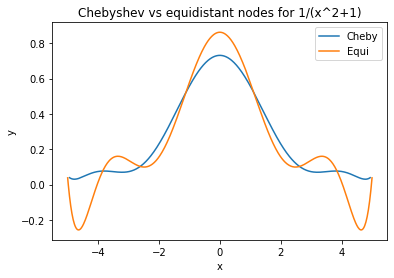

In [128]:
plt.figure()
plt.axes(xlabel = "x", ylabel = "y")
r = LagrangePol(chebyNode(-5, 5, 10, runge))
r.plot(label = "Cheby")
p = LagrangePol(equiNode(-5, 5, 10, runge))
p.plot(label = "Equi")
plt.title("Chebyshev vs equidistant nodes for 1/(x^2+1)")
plt.legend()
plt.show()

## Task ii
----

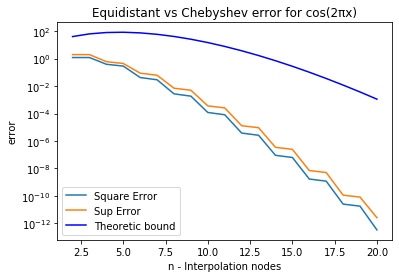

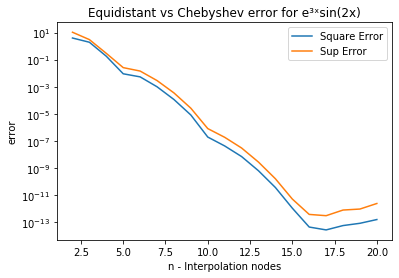

In [135]:
plt.figure()
plt.axes(xlabel = "n - Interpolation nodes", ylabel = "error")
v = ErrorLagrange(a, 0, 1, n = 20) #Interpolating the first function
v.plot()
(lambda ns: plt.plot(ns, list(map(lambda n: (2*np.pi)**(n+1)/factorial(n+1), ns)), 'b', label = "Theoretic bound"))(range(2,21)) # Plotting the theoretic bound
plt.title("Equidistant vs Chebyshev error for cos(2πx)")
plt.legend()
plt.show()
plt.figure()
plt.axes(xlabel = "n - Interpolation nodes", ylabel = "error")
u = ErrorLagrange(b, 0, np.pi/4, 20) #Interpolating the second function
u.plot()
plt.legend()
plt.title("Equidistant vs Chebyshev error for e³ˣsin(2x)")
plt.show()

## Task iii
----

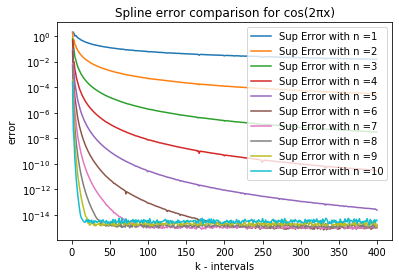

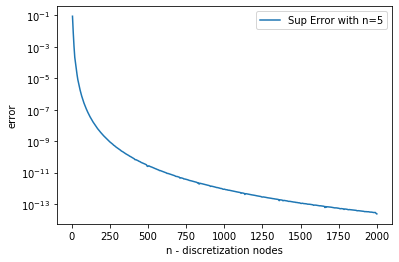

<Figure size 432x288 with 0 Axes>

In [130]:
plt.figure()
plt.axes(xlabel = "k - intervals", ylabel = "error")
u = ErrorSpline(a, 0, 1, 5, 400, extra = True)
u.extraplot()
plt.title("Spline error comparison for cos(2πx)")
plt.show()

plt.figure()
plt.axes(xlabel = "n - discretization nodes", ylabel = "error")
u.plot()
plt.figure("Spline error decresing for n = 5 and cos(2πx)")
plt.show()

### Extra plots
----

Done with 6 intervals
Done with 5 intervals
Done with 4 intervals
Done with 3 intervals
Done with 2 intervals
Done with 1 intervals


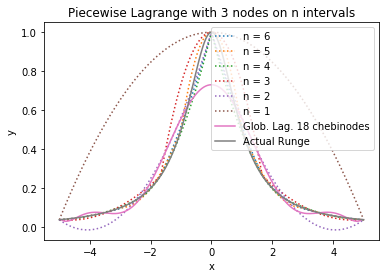

In [136]:
def pint(f, start, slutt, noder, steps):
  interval = np.linspace(start, slutt, steps)
  intervals = [(interval[i], interval[i + 1]) for i in range(len(interval) - 1)]
  return [equiNode(mi, ma, noder, f) for (mi, ma) in intervals]

plt.figure()
plt.axes(xlabel = "x", ylabel= "y")

rung5 = PiecewiseLagrange(pint(runge,-5.0,5.0,3,7))
rung5.plot(":",step=5000, label= "n = 6")

print("Done with 6 intervals")

rung5 = PiecewiseLagrange(pint(runge,-5.0,5.0,3,6))
rung5.plot(":",step=5000, label= "n = 5")

print("Done with 5 intervals")

rung4 = PiecewiseLagrange(pint(runge,-5.0,5.0,3,5))
rung4.plot(":",step=5000, label= "n = 4")

print("Done with 4 intervals")

rung3 = PiecewiseLagrange(pint(runge,-5.0,5.0,3,4))
rung3.plot(":",step=5000, label= "n = 3")

print("Done with 3 intervals")

rung2 = PiecewiseLagrange(pint(runge,-5.0,5.0,3,3))
rung2.plot(":",step=5000, label= "n = 2")

print("Done with 2 intervals")

rung1 = PiecewiseLagrange(pint(runge,-5.0,5.0,3,2))
rung1.plot(":",step=5000, label= "n = 1")

print("Done with 1 intervals")

c = Lagrange(chebyNode(-5, 5, 10, runge))
c.plot(label = "Glob. Lag. 18 chebinodes")

r = Plottable(runge, -5, 5)
r.plot(step=5000, label="Actual Runge")
plt.title("Piecewise Lagrange with 3 nodes on n intervals")
plt.legend()
plt.show()

## Task iv
----

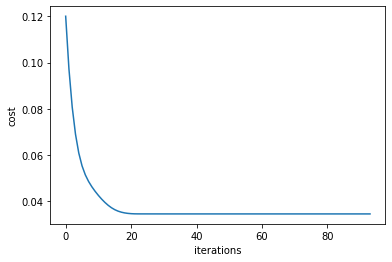

In [144]:
ls = equiNode(-5,5,1000,runge)
h = OptLagrangePol(ls,equiX(-5, 5, 10))
plt.figure() 
plt.axes(xlabel = "iterations", ylabel = "cost")
plt.plot(h.history)
plt.show()

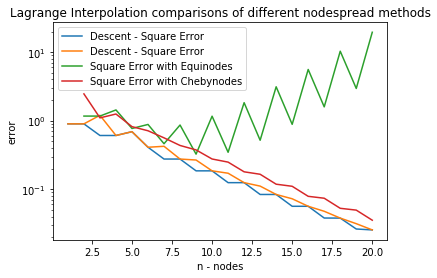

In [148]:
d = ErrorOptLeg(runge, -5, 5)
e = ErrorOpt(runge, -5, 5)
q = ErrorLagrange(runge, -5, 5)
r = ErrorLagrange(runge, -5, 5, v = "Cheby")
plt.figure()
plt.axes(xlabel = "n - nodes", ylabel = "error")
d.plot()
e.plot()
q.plot2()
r.plot2()
plt.title("Lagrange Interpolation comparisons of different nodespread methods")
plt.show() 

## Task v
----

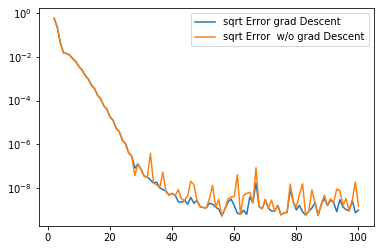

In [160]:
plt.figure()
u = ErrRBF(runge, -1, 1, 100)
u.plot()
plt.show()

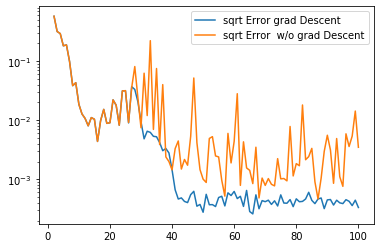

In [164]:
plt.figure()
u = ErrRBF(exfunc, -1, 1, 100)
u.plot()
plt.show()